In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.utils import resample
from scipy.cluster.hierarchy import linkage, dendrogram

OPIS SKUPA PODATAKA

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [48]:
df = pd.read_csv(r'podaci\online+shoppers+purchasing+intention+dataset\online_shoppers_intention preprocessed.csv', encoding='cp1252', sep=',')
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [49]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [50]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [51]:
X = df.drop('Revenue', axis=1)

In [52]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [53]:
scaler = StandardScaler()
X_sca = scaler.fit_transform(X)

In [54]:
def plot_clusters(X, labels, title):
    X = np.array(X)
    if X.ndim == 1:
        raise ValueError("Input data X must be 2D for plotting clusters.")
    if X.shape[1] < 2:
        raise ValueError("Input data X must have at least two features (columns) for 2D plotting.")
    print(title,"Silhouette:", silhouette_score(X, labels) if len(set(labels)) > 1 else "N/A")
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
    plt.title(title)
    plt.grid(True)
    plt.show()

MiniBatch KMeans + PCA Silhouette: 0.770085009300966


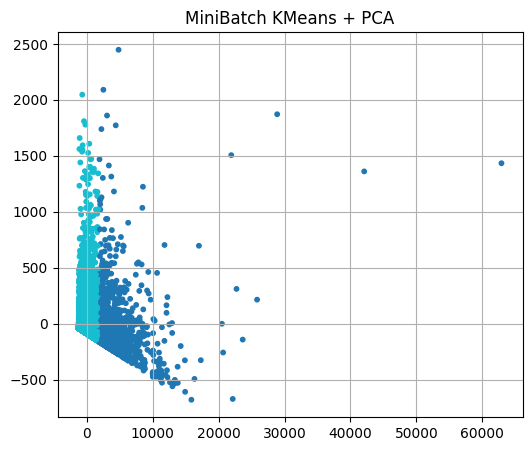

MiniBatch KMeans + PCA Silhouette: 0.5985616802110127


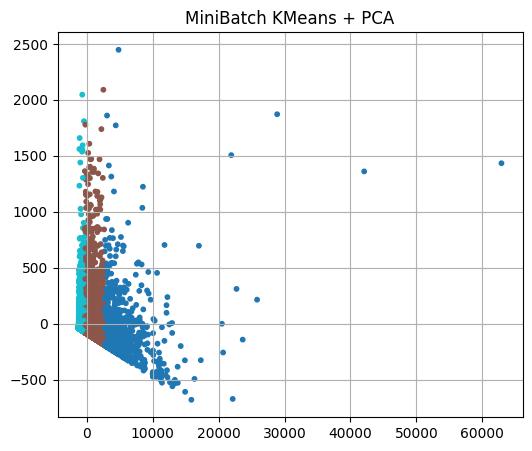

MiniBatch KMeans + PCA Silhouette: 0.578835929761111


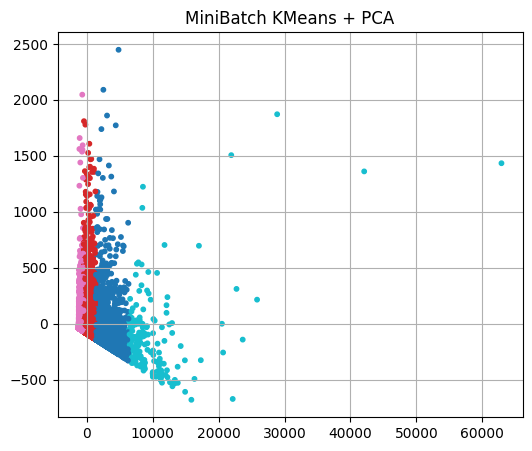

MiniBatch KMeans + PCA Silhouette: 0.4943543912523803


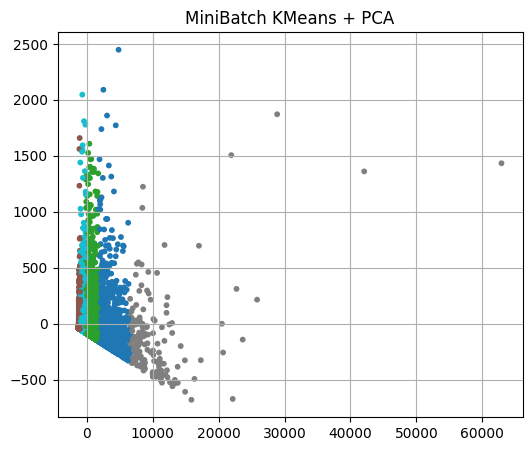

MiniBatch KMeans + PCA Silhouette: 0.569570116058306


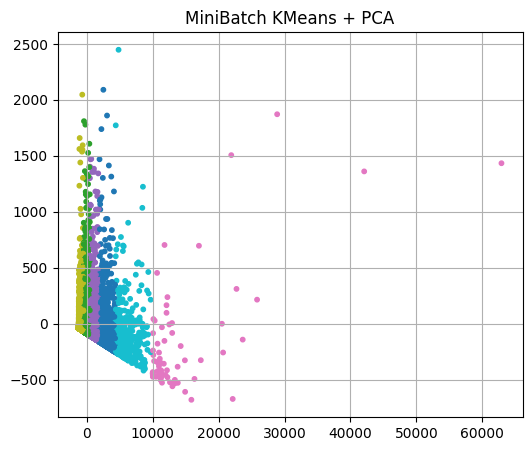

In [55]:
from sklearn.cluster import MiniBatchKMeans
# Najbolji rez na 2 klastera
for i in range(2,7):
    mb_kmeans = MiniBatchKMeans(n_clusters=i, random_state=123)
    
    # mb_kmeans.fit(X)
    # labels_mb = mb_kmeans.labels_
    # plot_clusters(X, labels_mb, 'MiniBatch KMeans')

    mb_kmeans.fit(X_pca)
    labels_mb_pca = mb_kmeans.labels_
    plot_clusters(X_pca, labels_mb_pca, 'MiniBatch KMeans + PCA')
    
    # mb_kmeans.fit(X_sca)
    # labels_mb_sca = mb_kmeans.labels_
    # plot_clusters(X_sca, labels_mb_sca, 'MiniBatch KMeans + SCA')

Spectral Clustering Silhouette: 0.49837829258546096


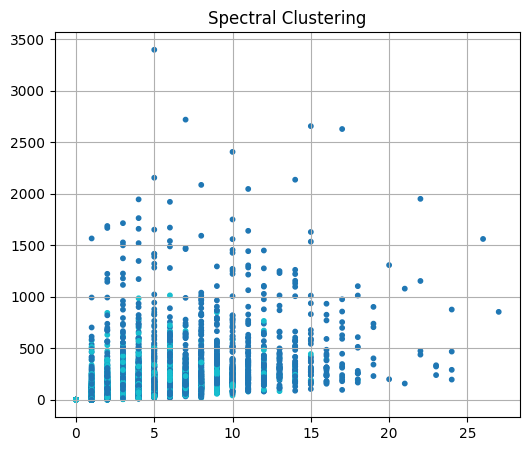

c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering + PCA Silhouette: -0.3601277671307286


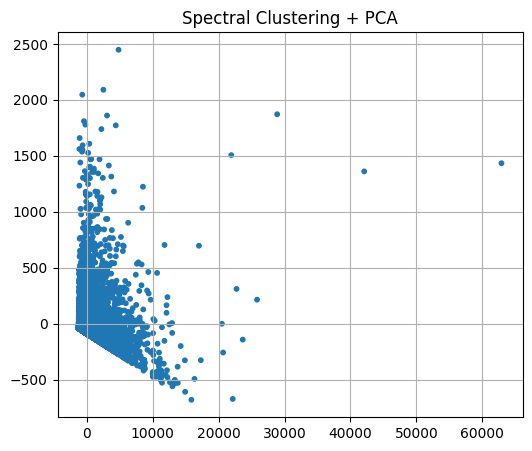

Spectral Clustering Silhouette: 0.3072095970089573


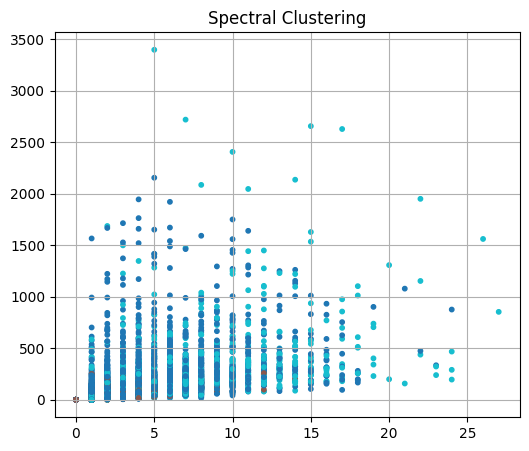

c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering + PCA Silhouette: -0.08651247418321266


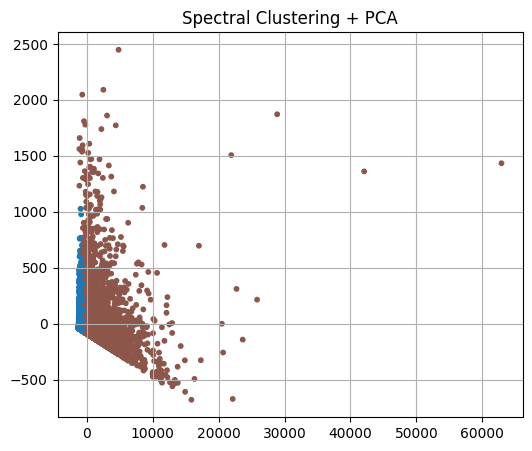

Spectral Clustering Silhouette: 0.2773874668028399


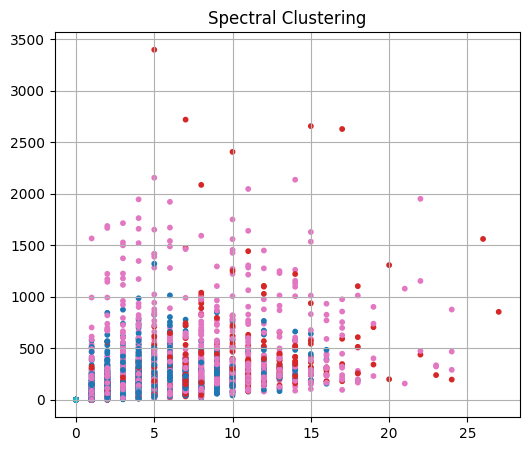

c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering + PCA Silhouette: -0.06995039665117196


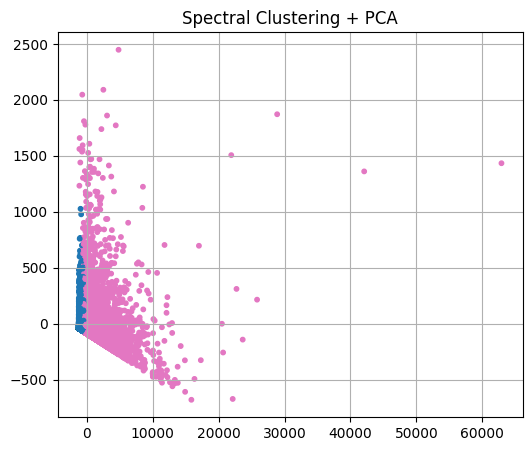

Spectral Clustering Silhouette: 0.2680085987234027


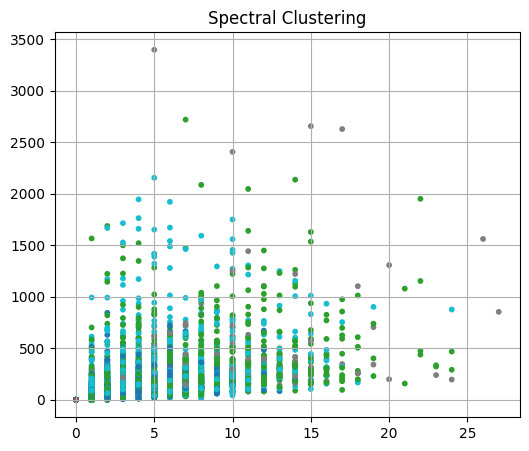

c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering + PCA Silhouette: 0.05448870174395886


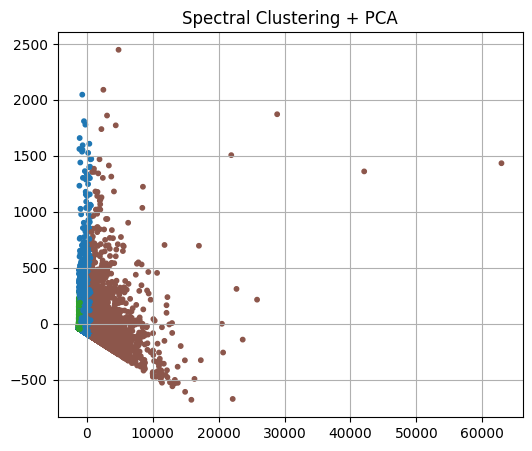

Spectral Clustering Silhouette: 0.31505472906531884


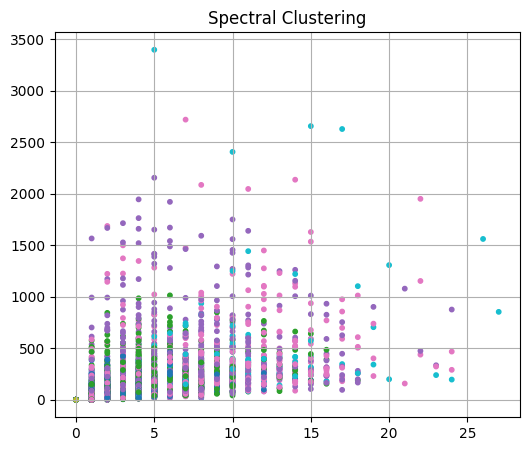

c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering + PCA Silhouette: 0.143415599881671


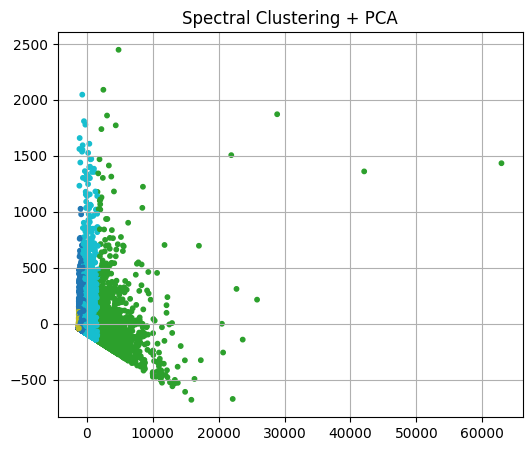

In [56]:
from sklearn.cluster import SpectralClustering

for i in range(2,7):
    spectral = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', random_state=123)

    labels_spectral = spectral.fit_predict(X)
    plot_clusters(X, labels_spectral, 'Spectral Clustering')

    labels_spectral_pca = spectral.fit_predict(X_pca)
    plot_clusters(X_pca, labels_spectral_pca, 'Spectral Clustering + PCA')

    # labels_spectral_sca = spectral.fit_predict(X_sca)
    # plot_clusters(X_sca, labels_spectral_sca, 'Spectral Clustering + SCA')

KMeans++ Silhouette: 0.7809884192698832


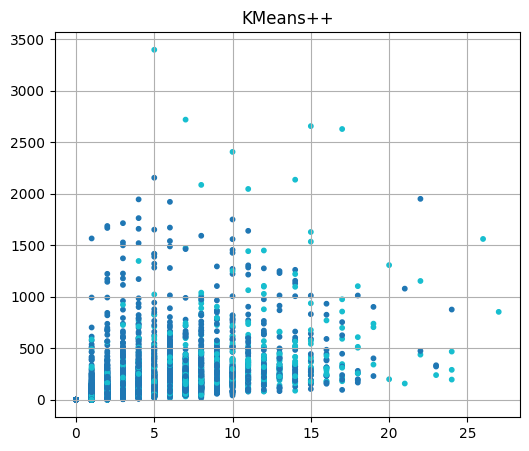

KMeans++ + PCA Silhouette: 0.7832243900602182


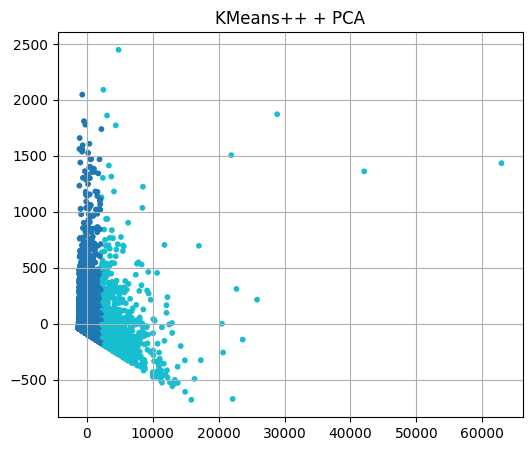

KMeans++ Silhouette: 0.6949777922441432


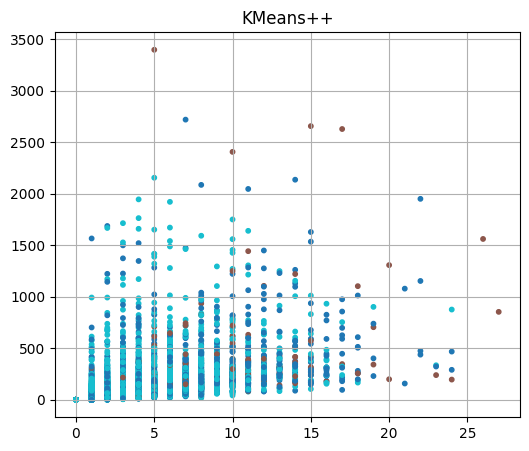

KMeans++ + PCA Silhouette: 0.6997473886522948


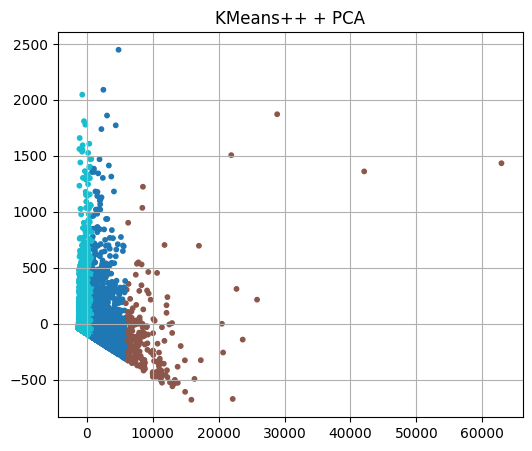

KMeans++ Silhouette: 0.6740026918724344


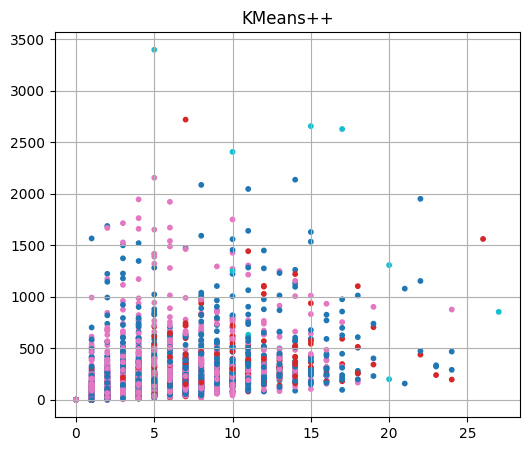

KMeans++ + PCA Silhouette: 0.6513591279575702


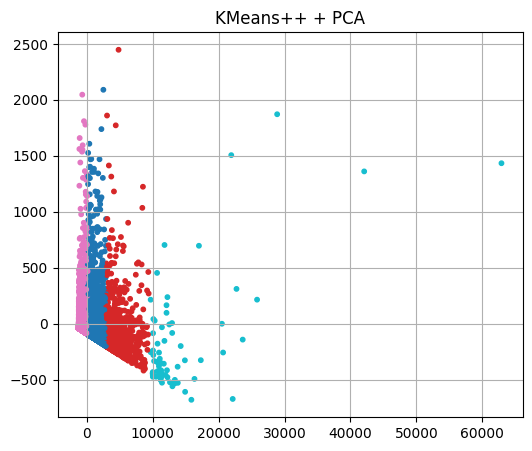

KMeans++ Silhouette: 0.621772146076937


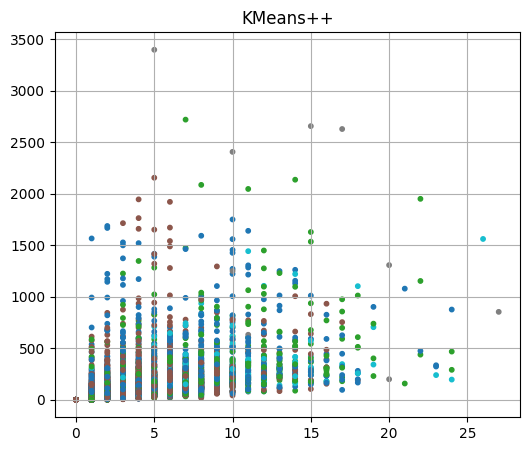

KMeans++ + PCA Silhouette: 0.6384507283049634


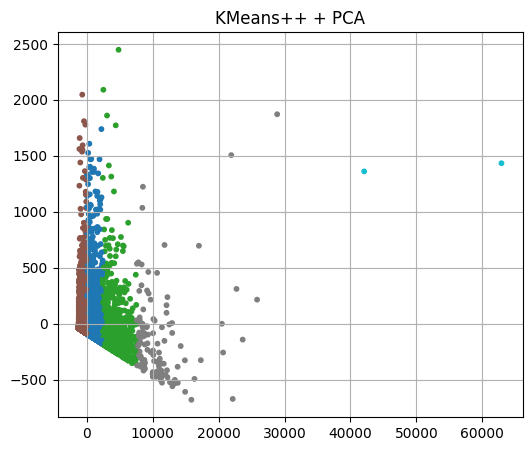

KMeans++ Silhouette: 0.5897177541504198


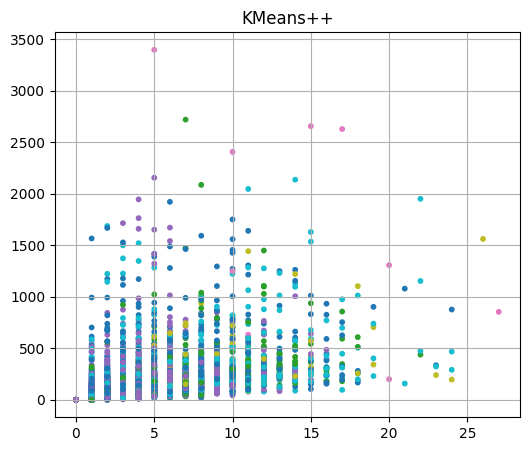

KMeans++ + PCA Silhouette: 0.6190440482673066


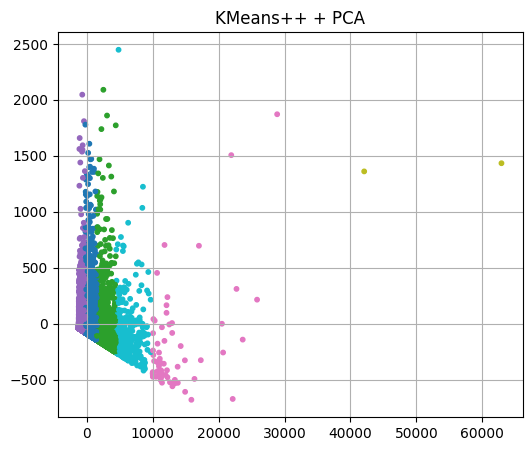

In [57]:
from sklearn.cluster import KMeans

for i in range(2,7):
    kmeans = KMeans(n_clusters=i , init='k-means++', random_state=123)

    labels_kmeans = kmeans.fit_predict(X)
    plot_clusters(X, labels_kmeans, 'KMeans++')

    labels_kmeans_pca = kmeans.fit_predict(X_pca)
    plot_clusters(X_pca, labels_kmeans_pca, 'KMeans++ + PCA')

    # labels_kmeans_sca = kmeans.fit_predict(X_sca)
    # plot_clusters(X_sca, labels_kmeans_sca, 'KMeans++ + SCA')

Faiss KMeans + PCA Silhouette: 0.8030100911399585


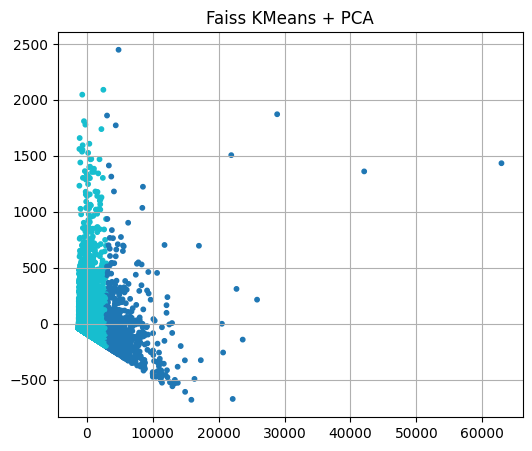

Faiss KMeans + PCA Silhouette: 0.6582117665732378


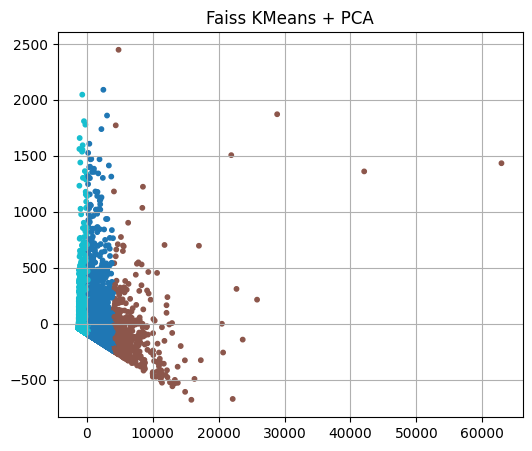

Faiss KMeans + PCA Silhouette: 0.6298661886640192


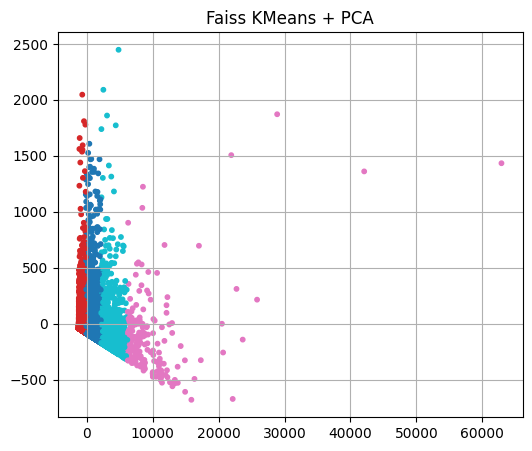

Faiss KMeans + PCA Silhouette: 0.569022152796549


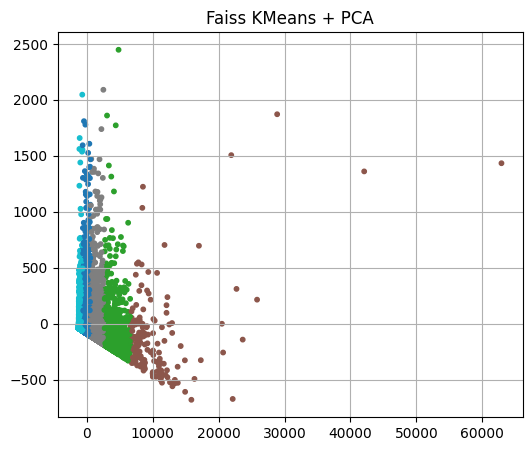

Faiss KMeans + PCA Silhouette: 0.5823407592835557


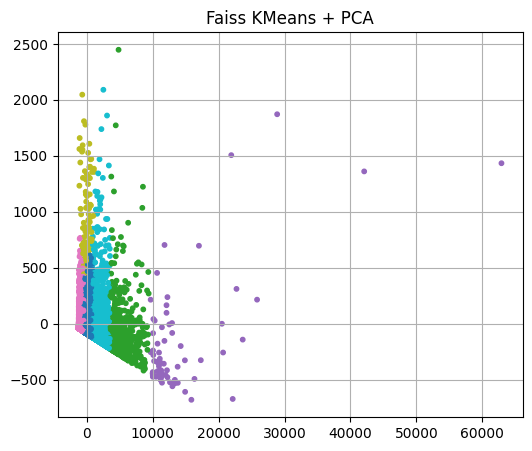

In [58]:
import faiss
X_faiss = X_pca.astype(np.float32)

for i in range(2,7):
    faiss_kmeans = faiss.Kmeans(d=X_faiss.shape[1], k=i)
    faiss_kmeans.train(X_faiss)

    D, I = faiss_kmeans.index.search(X_faiss, 1)
    labels_faiss = I.flatten()
    plot_clusters(X_pca, labels_faiss, 'Faiss KMeans + PCA')

In [60]:
# import hdbscan

# for i,j in [20,25][10,15]:
#     hdb = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10)
#     hdb.fit(X_sca)
#     labels_hdb = hdb.labels_
#     plot_clusters(X_pca, labels_hdb, 'HDBSCAN ')

Birch Clustering Silhouette: 0.820108029280827


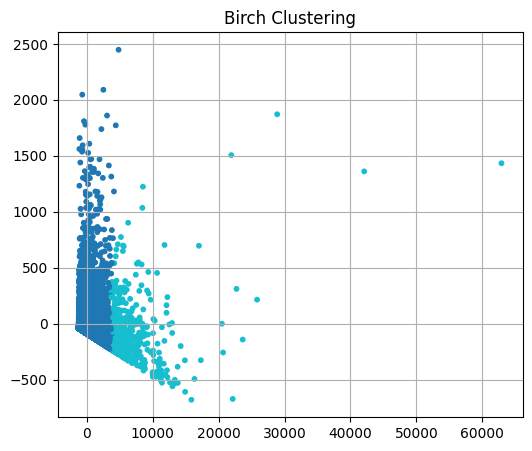

Birch Clustering Silhouette: 0.670372297389605


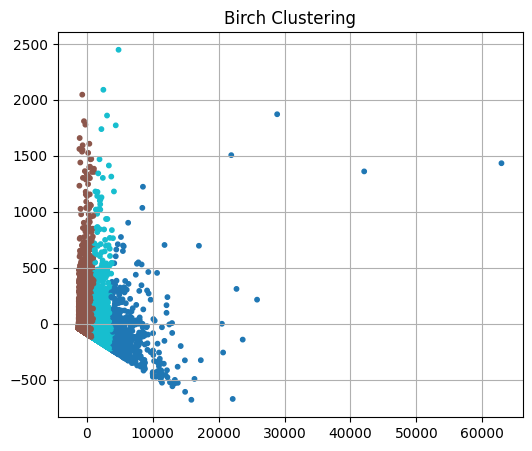

Birch Clustering Silhouette: 0.6736229123799164


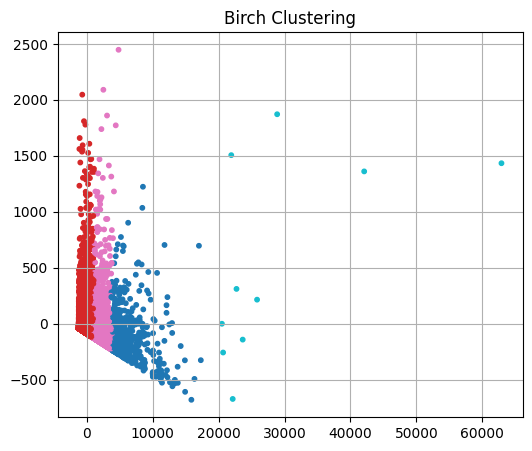

Birch Clustering Silhouette: 0.6711499654905392


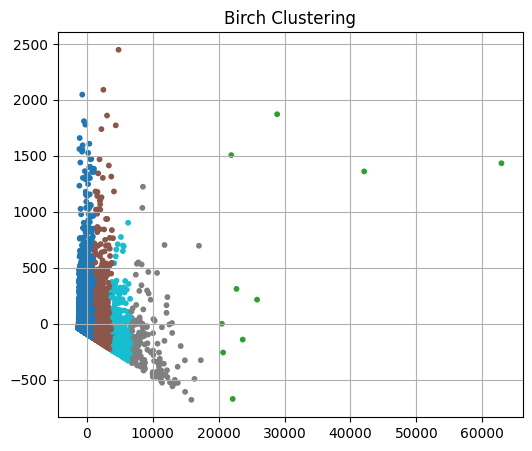

Birch Clustering Silhouette: 0.5764631832444662


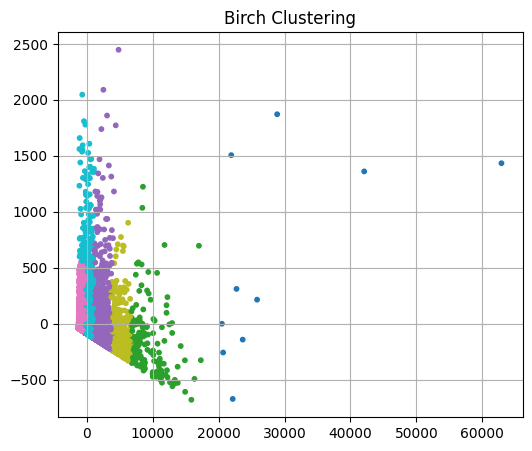

In [61]:
from sklearn.cluster import Birch

for i in range(2,7):

    birch = Birch(n_clusters=i)
    birch.fit(X_pca)
    labels_optics = birch.labels_
    plot_clusters(X_pca, labels_optics, 'Birch Clustering')